<a href="https://colab.research.google.com/github/adnanelhayani/Lab1/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Charger le dataset
df = pd.read_csv('predictive_maintenance.csv')

# Affichage des premières lignes pour comprendre le dataset
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


In [ ]:
# Supprimer les colonnes inutiles (par exemple, 'UDI', 'Product ID')
df = df.drop(['UDI', 'Product ID'], axis=1)

# Encoder les étiquettes pour les variables catégorielles
df['Type'] = LabelEncoder().fit_transform(df['Type'])


# Afficher le dataset nettoyé et normalisé
print(df.head())

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [ ]:
# Utiliser LabelEncoder pour convertir les valeurs textuelles en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

print(df)

      Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   

In [ ]:
print(df.dtypes)

Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int64
dtype: object


In [ ]:
# Afficher le nombre de valeurs manquantes
print(df.isnull().sum())

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [ ]:
# Standardisation/normalisation des données
scaler = StandardScaler()
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[features] = scaler.fit_transform(df[features])


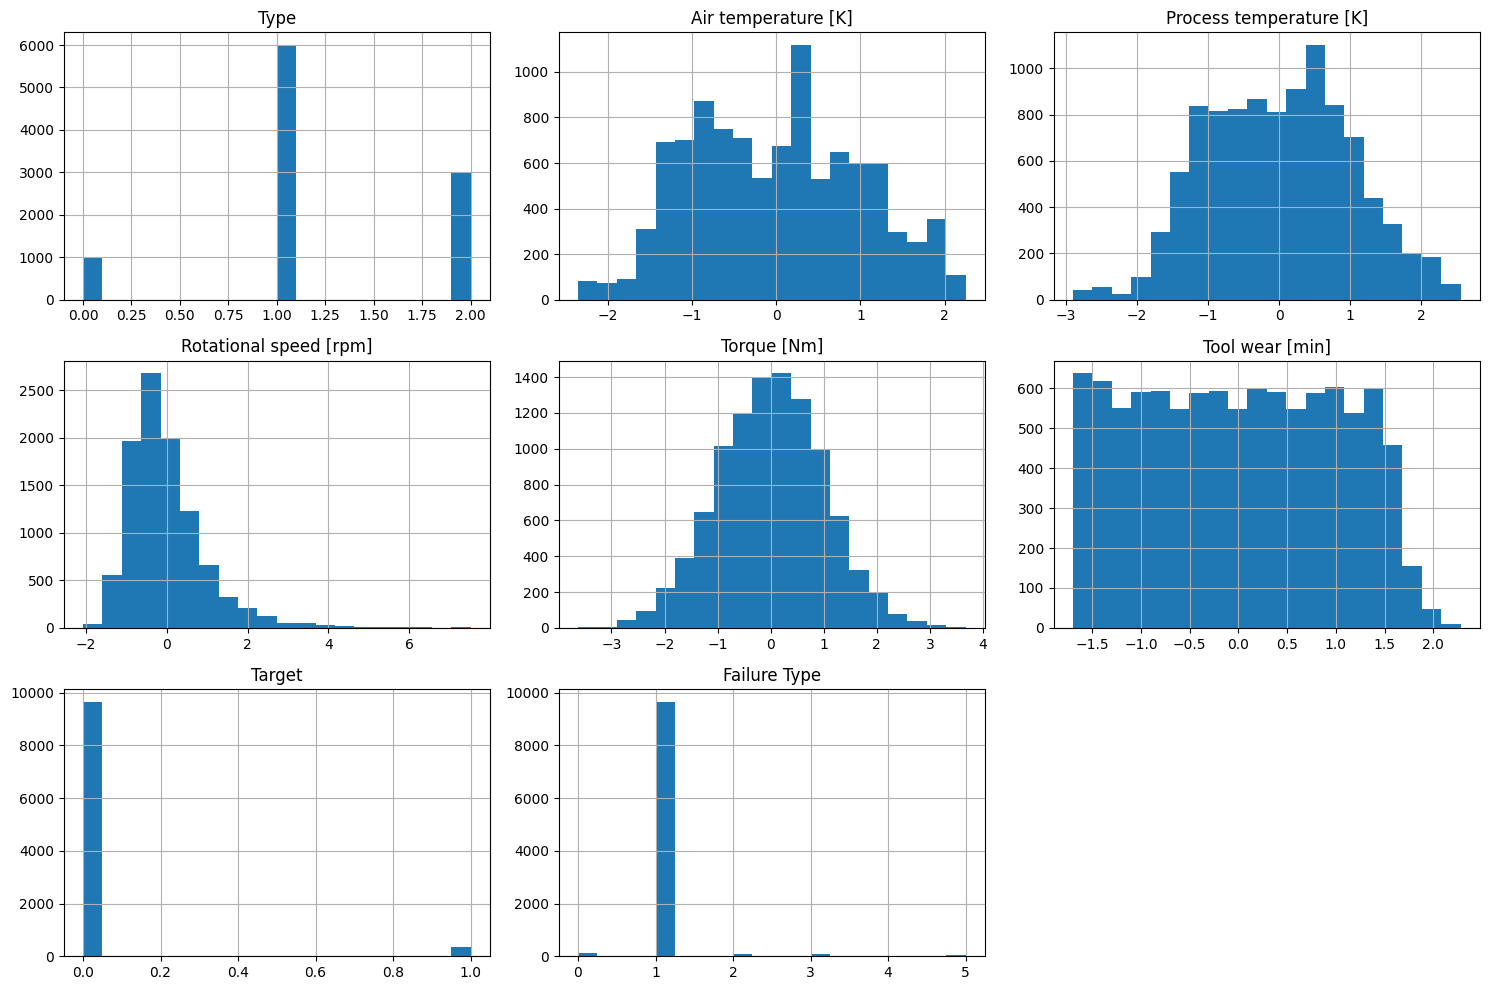

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Histogrammes des variables numériques
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


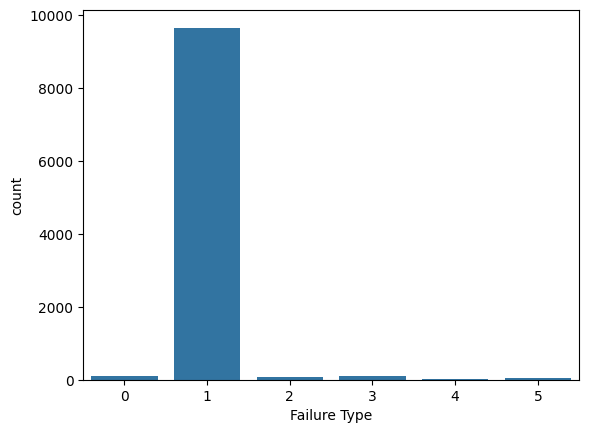

In [ ]:
sns.countplot(data=df, x='Failure Type')
plt.show()


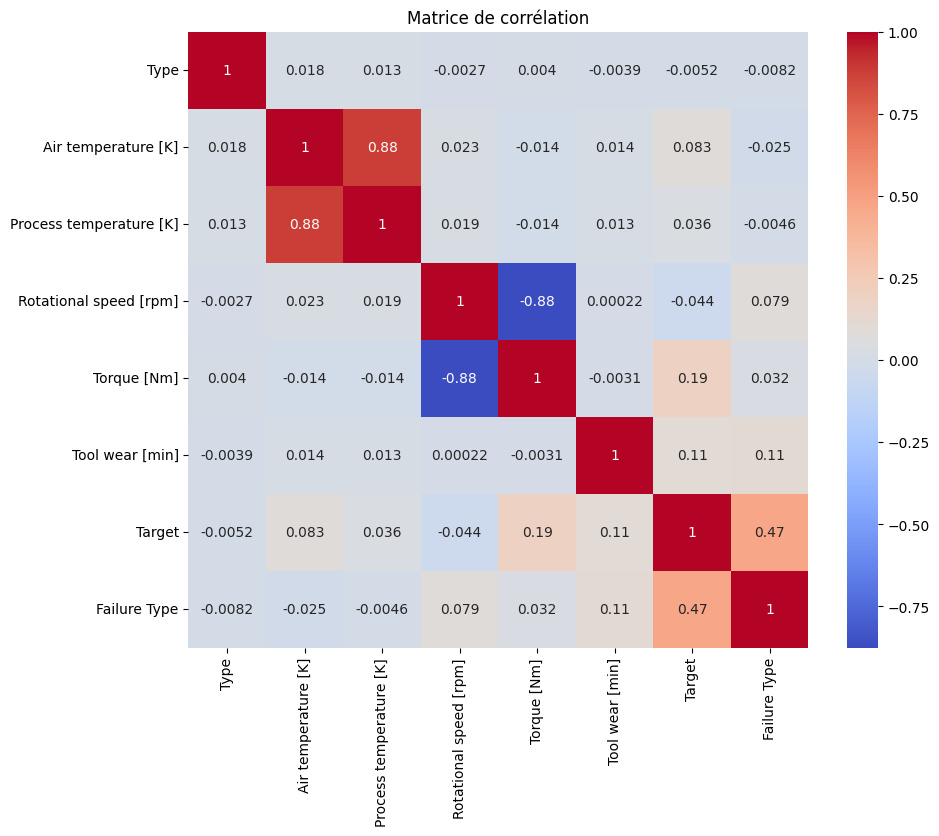

In [ ]:
# Exclure les colonnes non numériques pour calculer la corrélation
df_numeric = df.select_dtypes(include=['number'])

# Afficher la corrélation entre les variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

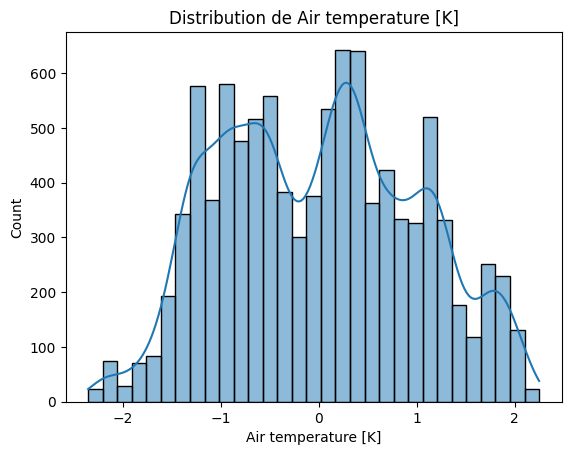

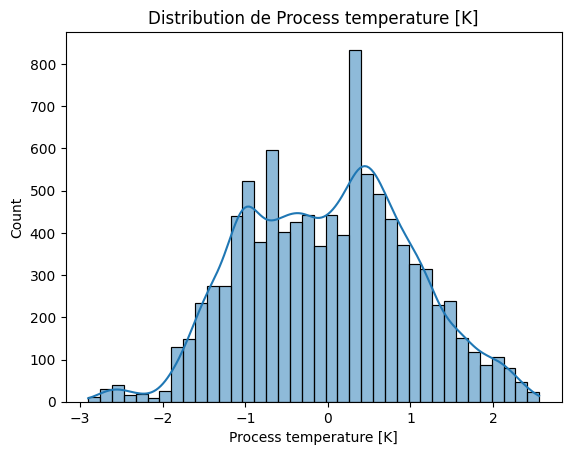

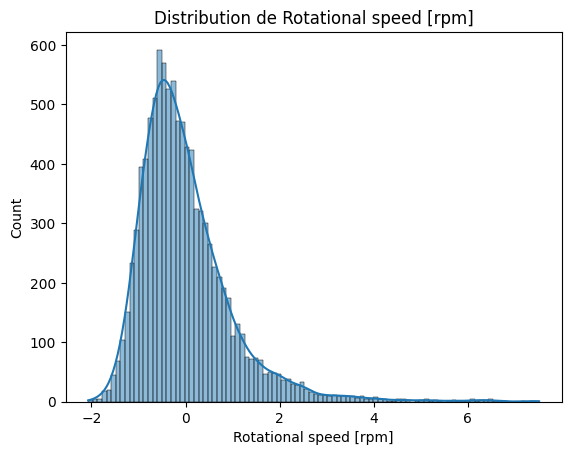

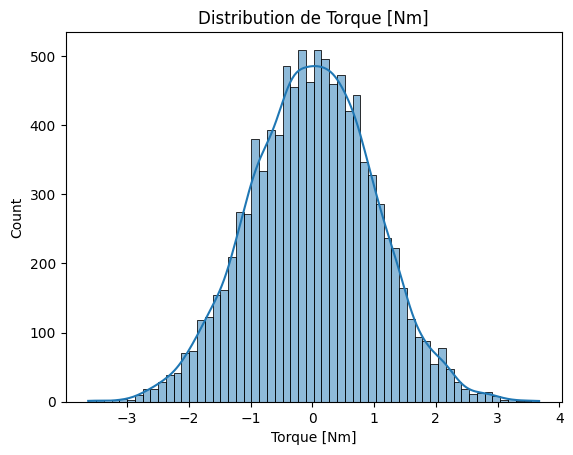

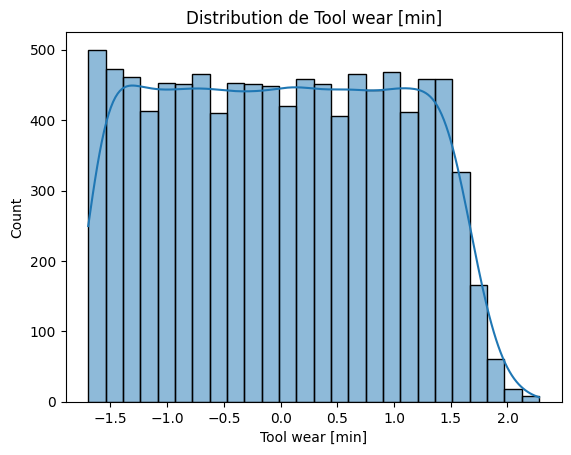

In [ ]:
# Distribution des caractéristiques après normalisation
for feature in features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution de {feature}")
    plt.show()

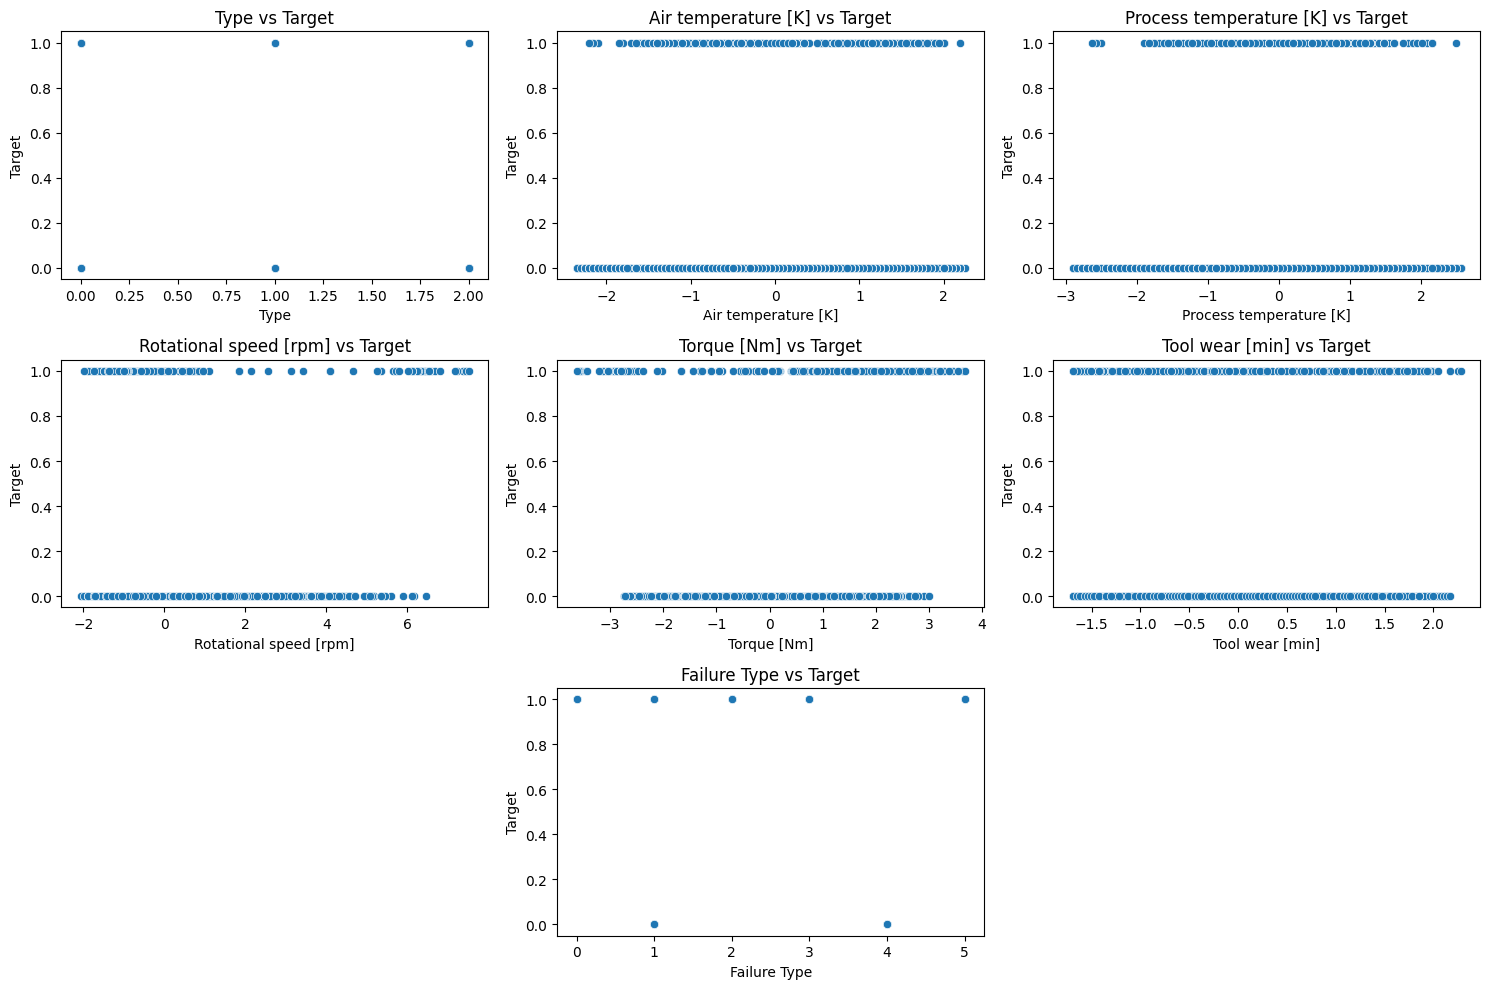

In [ ]:
# Scatterplots pour analyser la relation avec 'Target'
plt.figure(figsize=(15, 10))
num_cols = len(df.select_dtypes(include=[np.number]).columns) - 1  # Exclure la colonne 'Target'
rows = (num_cols + 2) // 3  # Calcul pour obtenir suffisamment de lignes pour accueillir tous les colonnes

for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    if col != 'Target':
        plt.subplot(rows, 3, i)
        sns.scatterplot(x=df[col], y=df['Target'])
        plt.title(f'{col} vs Target')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

# Séparation des classes majoritaires et minoritaires
df_majority = df[df['Target'] == 0]
df_minority = df[df['Target'] == 1]

# Suréchantillonnage de la classe minoritaire
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combinaison des datasets pour obtenir un dataset équilibré
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print("Répartition des classes après équilibrage :\n", df_balanced['Target'].value_counts())


Répartition des classes après équilibrage :
 Target
0    9661
1    9661
Name: count, dtype: int64


In [ ]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=['Target']).values  # Toutes les colonnes sauf 'target'
y = df['Target'].values  # La colonne cible

# Normalisation des caractéristiques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisation des données

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import torch

# Convertir les données en tensors PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convertir les étiquettes en tensors PyTorch (pour classification multi-classes, utiliser dtype long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [ ]:
import torch.nn as nn

class DeepNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DeepNN, self).__init__()

        # Définir les couches
        self.fc1 = nn.Linear(input_size, 128)  # Première couche cachée
        self.fc2 = nn.Linear(128, 64)  # Deuxième couche cachée
        self.fc3 = nn.Linear(64, num_classes)  # Couche de sortie (une sortie par classe)

        # Fonction d'activation
        self.relu = nn.ReLU()

    def forward(self, x):
        # Passer les données à travers les couches
        x = self.relu(self.fc1(x))  # Première couche cachée
        x = self.relu(self.fc2(x))  # Deuxième couche cachée
        x = self.fc3(x)  # Couche de sortie (sans activation, CrossEntropyLoss gère softmax)
        return x


In [ ]:
# Nombre d'entrées (features) et nombre de classes
input_size = X_train.shape[1]  # Nombre de caractéristiques
num_classes = len(np.unique(y))  # Nombre de classes cibles (unique dans y)

# Initialiser le modèle
model = DeepNN(input_size=input_size, num_classes=num_classes)

# Définir la fonction de perte
criterion = nn.CrossEntropyLoss()

# Définir l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Entraînement du modèle
num_epochs = 50  # Nombre d'époques

for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    optimizer.zero_grad()  # Réinitialiser les gradients

    # Passer les données d'entraînement à travers le modèle
    outputs = model(X_train_tensor)

    # Calculer la perte
    loss = criterion(outputs, y_train_tensor)

    # Faire rétropropagation
    loss.backward()

    # Mettre à jour les poids
    optimizer.step()

    # Afficher la perte toutes les 10 époques
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.4351
Epoch [20/50], Loss: 0.2413
Epoch [30/50], Loss: 0.1756
Epoch [40/50], Loss: 0.1280
Epoch [50/50], Loss: 0.1056


In [ ]:
# Évaluation du modèle
model.eval()  # Mettre le modèle en mode évaluation
with torch.no_grad():  # Pas de calcul des gradients
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Prendre la classe avec la probabilité la plus élevée
    correct = (predicted == y_test_tensor).sum().item()  # Comparer les prédictions avec les vraies étiquettes
    accuracy = correct / y_test_tensor.size(0)
    print(f'Accuracy on the test dataset: {accuracy }')


Accuracy on the test dataset: 0.9845


In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
import torch.optim as optim

# Définir le modèle PyTorch avec skorch
net = NeuralNetClassifier(
    model,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    max_epochs=50,
    lr=0.001,
    train_split=None,  # Pas de validation interne dans skorch
    verbose=0
)

# Définir les hyperparamètres à tester
params = {
    'lr': [0.01, 0.001,],
    'max_epochs': [50, 100],
    'optimizer': [optim.Adam, optim.SGD],
    'module__input_size': [input_size],
    'module__num_classes': [num_classes]
}

# Lancer GridSearchCV
gs = GridSearchCV(net, params, refit=True, cv=3, scoring='accuracy')
gs.fit(X_train_tensor, y_train_tensor)

# Meilleurs hyperparamètres
print("Best hyperparameters:", gs.best_params_)


Best hyperparameters: {'lr': 0.001, 'max_epochs': 50, 'module__input_size': 7, 'module__num_classes': 2, 'optimizer': <class 'torch.optim.adam.Adam'>}


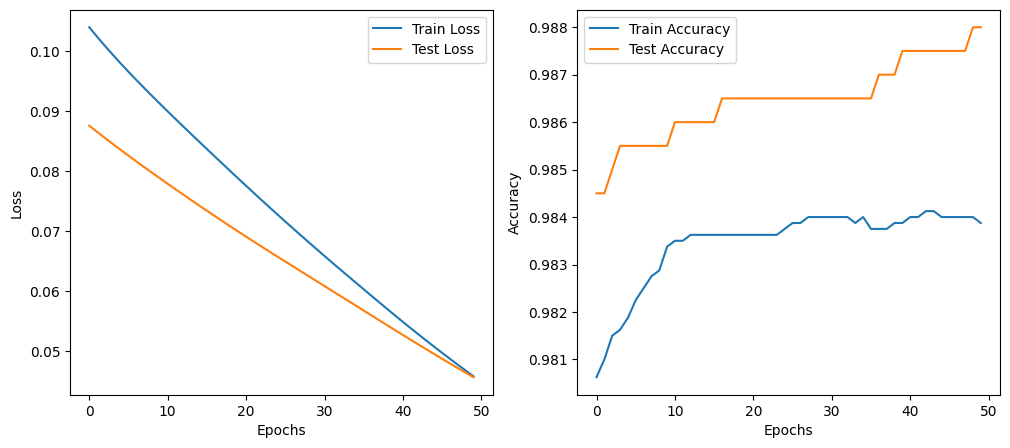

In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Calculer la perte et l'exactitude pour les données de test
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

        # Calculer l'exactitude
        _, train_predicted = torch.max(outputs, 1)
        train_accuracy = (train_predicted == y_train_tensor).sum().item() / y_train_tensor.size(0)
        train_accuracies.append(train_accuracy)

        _, test_predicted = torch.max(test_outputs, 1)
        test_accuracy = (test_predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
        test_accuracies.append(test_accuracy)

# Visualisation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Forward pass for predictions
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_test_pred = torch.max(outputs, 1)  # Get predicted labels

# Convert predictions and ground truth to numpy arrays for sklearn metrics
y_test_np = y_test_tensor.numpy()  # Convert tensor to numpy array
y_test_pred_np = y_test_pred.numpy()  # Convert tensor to numpy array

# Calculate metrics
accuracy = accuracy_score(y_test_np, y_test_pred_np)
f1 = f1_score(y_test_np, y_test_pred_np, average='weighted')
recall = recall_score(y_test_np, y_test_pred_np, average='weighted')
precision = precision_score(y_test_np, y_test_pred_np, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")


Accuracy: 0.9880
F1 Score: 0.9874
Recall: 0.9880
Precision: 0.9873


In [ ]:
import torch.nn.functional as F

class RegularizedDeepNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RegularizedDeepNN, self).__init__()

        # Define layers with batch normalization and dropout
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization for first hidden layer
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)   # Batch normalization for second hidden layer
        self.fc3 = nn.Linear(64, num_classes)

        # Dropout layer (30% dropout rate)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)  # Apply dropout after first hidden layer
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)  # Apply dropout after second hidden layer
        x = self.fc3(x)
        return x

# Initialize model with regularization
model = RegularizedDeepNN(input_size=input_size, num_classes=num_classes)

# Define optimizer with weight decay (L2 regularization)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Loss function
criterion = nn.CrossEntropyLoss()

# Training loop (you can reuse the previous training loop)
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_test_pred = torch.max(outputs, 1)

# Calculate metrics to compare with the first model
accuracy = accuracy_score(y_test_np, y_test_pred.numpy())
f1 = f1_score(y_test_np, y_test_pred.numpy(), average='weighted')
recall = recall_score(y_test_np, y_test_pred.numpy(), average='weighted')
precision = precision_score(y_test_np, y_test_pred.numpy(), average='weighted')

print(f"Regularized Model - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")


Epoch [10/50], Loss: 0.4705
Epoch [20/50], Loss: 0.2879
Epoch [30/50], Loss: 0.2023
Epoch [40/50], Loss: 0.1586
Epoch [50/50], Loss: 0.1289
Regularized Model - Accuracy: 0.9960, F1 Score: 0.9961, Recall: 0.9960, Precision: 0.9962
